#Survival Analysis_female marriage for the first time in SAT village
 SAT means Honduran Sistema de Aprendizaje Tutorial, or an innovative middle school model (McEwan et al, 2015)
 CEB means the Centro de Educación Básica, or the traditional educational system
 
 In this project, I am investigating how residing in Honduran SAT villages affects the age at first marriage for the female population. Interestingly, I find that living in SAT villages actually lowers the age at first marriage when we control for age, math and language scores.

In [1]:
# Load core data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data
# Read the file and specify the column name/type, along with parameters

col_dtypes = {'Index':int,'PID':int, 'AGE':int, 'Y':int,\
              'CENSORED':int, 'SAT':int, 'MATH':float, 'LANG':float,\
              'VILLAGE_PAIR':int}

PersonYear  = pd.read_csv('/Users/davidson/Downloads/marriage.out',dtype=col_dtypes,\
                    na_values='', engine='c', sep = '\t',encoding = 'utf-8')

print(PersonYear[0:32])

    Unnamed: 0   PID  AGE  Y  CENSORED  SAT      MATH      LANG  VILLAGE_PAIR
0            0  1001   14  0         1    0 -0.791665 -1.293905             7
1            1  1001   15  0         1    0 -0.791665 -1.293905             7
2            2  1001   16  0         1    0 -0.791665 -1.293905             7
3            3  1001   17  0         1    0 -0.791665 -1.293905             7
4            4  1001   18  0         1    0 -0.791665 -1.293905             7
5            5  1001   19  0         1    0 -0.791665 -1.293905             7
6            6  1001   20  0         1    0 -0.791665 -1.293905             7
7            7  1001   21  0         1    0 -0.791665 -1.293905             7
8            8  1006   14  0         1    0 -0.968173 -1.633827             7
9            9  1006   15  0         1    0 -0.968173 -1.633827             7
10          10  1006   16  0         1    0 -0.968173 -1.633827             7
11          11  1006   17  0         1    0 -0.968173 -1.633827 

/Users/davidson/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Describe the marriage histories, including a discussion of censoring, if any, of these five women.

According the person period dataset, the first three women (with PID 1001, 1006, 1010) seem to have been censored and thus exitted the sample at the age of 21, 21, and 20, respectively. Out of the remaining two women, the woman with PID 1011 got married at the age of 18 and exitted the sample, while the woman with PID 1012 did so at the age of 15. It is also notable that unlike other women, the censored woman with PID 1010 started getting surveyed into the sample at the age of 13, and not 14.

PID: Person ID

In [2]:
#Create a dummy variable for each unique age value in the dataset and add these to your dataframe
PersonYear = pd.concat([PersonYear, pd.get_dummies (PersonYear['AGE'].astype('category'), prefix ='AGE')], axis=1)

#Create a dummy variable for all rows corresponding to ages 23 and above and call it “AGE_23+”.

PersonYear['AGE_23+'] = PersonYear['AGE_23']+PersonYear['AGE_24']+PersonYear['AGE_25']+PersonYear['AGE_26']+PersonYear['AGE_27']+PersonYear['AGE_28']

PersonYear = PersonYear.drop(['AGE_23','AGE_24','AGE_25','AGE_26','AGE_27','AGE_28'],axis=1)

In [3]:
#Compute the discrete-time baseline hazard using logistic regression as described in lecture and
#Singer and Willet (2003, Chapter 11).

# Construct the outcome vector for logistic regression 
Y = PersonYear['Y']
# Construct the design matrix for the logistic regression

X = PersonYear.loc[:,'AGE_12':]
#Compute the logistic regression
#Cluster of units (on 'PID'), to obtain correct standard errors: cluster-robust standard errors
logit = sm.Logit(Y,X).fit(cov_type='cluster', cov_kwds={'groups': PersonYear['PID']},use_t=True)
logit.summary()

Optimization terminated successfully.
         Current function value: 0.239422
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                 4159
Model:                          Logit   Df Residuals:                     4147
Method:                           MLE   Df Model:                           11
Date:                Fri, 04 May 2018   Pseudo R-squ.:                 0.05575
Time:                        02:07:27   Log-Likelihood:                -995.76
converged:                       True   LL-Null:                       -1054.5
                                        LLR p-value:                 5.546e-20
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE_12        -5.0814      0.711     -7.149      0.000      -6.477      -3.685
AGE_13        -4.3567      0.412    -10.581      0.000      -5.165      -3.548
AGE_14        -3.4302      0.247    -13.890      0.000      -3.915      -2.945
AGE_15        -2.5998      0.166    -15.631      0.000      -2.926      -2.273
AGE_16        -2.3232      0.152    -15.328      0.000      -2.621      -2.026
AGE_17        -2.3026      0.157    -14.696      0.000      -2.610      -1.995
AGE_18        -2.0996      0.152    -13.843      0.000      -2.398      -1.802
AGE_19        -1.9729      0.156    -12.646      0.000      -2.279      -1.667
AGE_20        -2.3925      0.254     -9.422      0.000      -2.891      -1.894
AGE_21        -1.9716      0.323     -6.113      0.000      -2.605      -1.338
AGE_22        -2.1041      0.475     -4.432      0.000      -3.036      -1.172
AGE_23+       -2.1748      0.501     -4.337      0.000      -3.160      -1.190
==============================================================================
"""

In your model include the dummies “AGE_12”,“AGE_13”,.... “AGE_22” and “AGE_23+”. Do not include a constant in your model. Why? [2 -3 sentences]

We're going to exclude a constant from our fit. This is related to degree of freedom and done to prevent multicollinearity, or the dummy variable trap caused by including a dummy variable for every single category in addition to a constant. We can avoid this issue by removing a constant (we could have added a constant and removed one of the age dummies, but we wouldn't want to because we want each age dummy variable in the regression, since its coefficient gives a logit of the baseline hazard rate).

In [4]:
logit_coeff = np.array(logit.params)

logit_coeff= logit_coeff[0:-1]
logit_coeff

array([-5.08140436, -4.35670883, -3.43018492, -2.59983662, -2.32320438,
       -2.30258509, -2.09964425, -1.97289829, -2.39253333, -1.97155258,
       -2.10413415])

[ 0.00617284  0.01265823  0.03136531  0.06914894  0.08921933  0.09090909
  0.1091314   0.12207792  0.08374384  0.12222222  0.10869565]


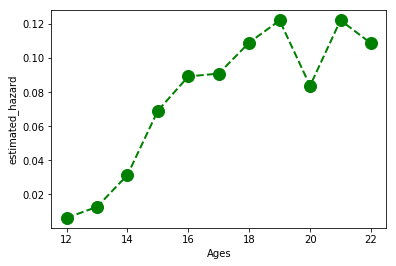

In [5]:
#4Plot the baseline hazard for ages 12 to 22. Remember the coefficients on the
#dummy variables correspond to the logit of the baseline hazard so you will need to transform
#them prior to plotting.

Ages = np.array([12,13,14,15,16,17,18,19,20,21,22])
logit_baseline_hazard = logit_coeff
estimated_hazard = np.exp(logit_baseline_hazard)/(1+np.exp(logit_baseline_hazard))
print (estimated_hazard)

plt.xlabel('Ages')
plt.ylabel('estimated_hazard')
plt.plot(Ages, estimated_hazard,color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=12)
plt.show()

In [7]:
#4Plot the Kaplan-Meier survival function estimate based on your analysis in #3. 
Values = 1-estimated_hazard
initial = 1
products = []

for v in Values:
    initial = initial * v
    products.append(initial)
    
print ('Values: ', Values)
print ('Products:   ', products)

Values:  [ 0.99382716  0.98734177  0.96863469  0.93085106  0.91078067  0.90909091
  0.8908686   0.87792208  0.91625616  0.87777778  0.89130435]
Products:    [0.99382716049382713, 0.98124706985466481, 0.95046994773745208, 0.88474596198964939, 0.80580951928425315, 0.73255410844023017, 0.65260945072626286, 0.57294024505318664, 0.5249600274871562, 0.46079824634983713, 0.41071148044224615]


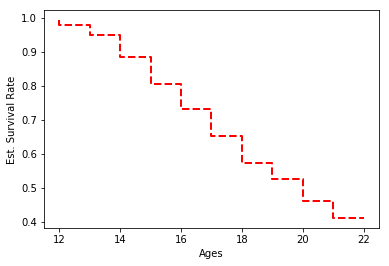

In [8]:
Survival_Rate = products

plt.xlabel('Ages')
plt.ylabel('Est. Survival Rate')
plt.step(Ages, Survival_Rate,color='red', linestyle='dashed', linewidth=2)
plt.show()

          KM_estimate
timeline             
0.0          1.000000
12.0         0.999519
13.0         0.997955
14.0         0.992908
15.0         0.979171
16.0         0.958328
17.0         0.933212
18.0         0.895792
19.0         0.841326
20.0         0.804464
21.0         0.756631
22.0         0.716808
23.0         0.672922
24.0         0.672922
25.0         0.602088
26.0         0.602088
27.0         0.602088
28.0         0.602088


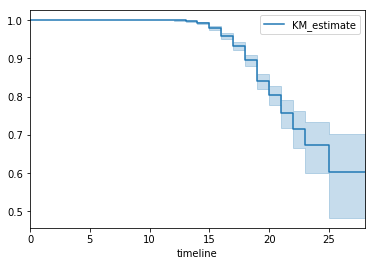

In [9]:
#For Comparison
#4Plot the Kaplan-Meier survival function estimate based on your analysis in #3.

from lifelines import KaplanMeierFitter

T = PersonYear['AGE']
E = PersonYear['Y']

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

print (kmf.survival_function_)
#print (kmf.median_)
kmf.plot()
plt.show()

In [10]:
#5 Plot 95 percent point-wise confidence intervals around your estimated survival function. Use Greenwood formula for confidence level.
print(len(PersonYear['PID'].unique()))

616


In [11]:
D12 = np.array(PersonYear['PID'][PersonYear['Y']==1][PersonYear['AGE']==12])
print(len(D12))
D13 = np.array(PersonYear['PID'][PersonYear['Y']==1][PersonYear['AGE']==13])
print(len(D13))
D14 = np.array(PersonYear['PID'][PersonYear['Y']==1][PersonYear['AGE']==14])
print(len(D14))
D15 = np.array(PersonYear['PID'][PersonYear['Y']==1][PersonYear['AGE']==15])
print(len(D15))
D16 = np.array(PersonYear['PID'][PersonYear['Y']==1][PersonYear['AGE']==16])
print(len(D16))
D17 = np.array(PersonYear['PID'][PersonYear['Y']==1][PersonYear['AGE']==17])
print(len(D17))
D18 = np.array(PersonYear['PID'][PersonYear['Y']==1][PersonYear['AGE']==18])
print(len(D18))
D19 = np.array(PersonYear['PID'][PersonYear['Y']==1][PersonYear['AGE']==19])
print(len(D19))
D20 = np.array(PersonYear['PID'][PersonYear['Y']==1][PersonYear['AGE']==20])
print(len(D20))
D21 = np.array(PersonYear['PID'][PersonYear['Y']==1][PersonYear['AGE']==21])
print(len(D21))
D22 = np.array(PersonYear['PID'][PersonYear['Y']==1][PersonYear['AGE']==22])
print(len(D22))

D = [len(D12), len(D13), len(D14), len(D15), len(D16), len(D17), len(D18), len(D19), len(D20), len(D21), len(D22)]
print (D)

2
6
17
39
48
45
49
47
17
11
5
[2, 6, 17, 39, 48, 45, 49, 47, 17, 11, 5]


In [12]:
N = D/estimated_hazard
N = np.round(N)
N
#Note: N[0] (Age12), N[1] (Age13), N[2] (Age14) all seem to have erroneous values

array([ 324.,  474.,  542.,  564.,  538.,  495.,  449.,  385.,  203.,
         90.,   46.])

values:  [ 0.00437839  0.00520072  0.00772939  0.0114766   0.01349371  0.01421338
  0.01651752  0.01900466  0.02121876  0.0393334   0.05148896]
sums:    [0.0043783911457727885, 0.009579111807558589, 0.017308500824641571, 0.028785096982555033, 0.042278809112693959, 0.056492190203067991, 0.073009711439473296, 0.092014376241942392, 0.11323313472676588, 0.15256653957544578, 0.20405550409850076]
[ 0.00435136  0.00510319  0.00734655  0.01015387  0.01087336  0.01041207
  0.01077949  0.01088854  0.011139    0.01812476  0.02114711]


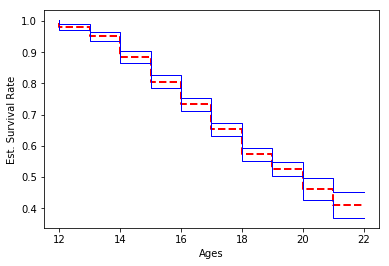

In [13]:
#5 Plot 95 percent point-wise confidence intervals around your estimated survival function. Use Greenwood formula for confidence level.

###########################
odds_ratio = np.exp(logit_baseline_hazard)

values = (odds_ratio/N)**(1/2)
total = 0
sums = []

for v in values:
    total = total + v
    sums.append(total)
    
print ('values: ', values)
print ('sums:   ', sums)

###########################
SE = Survival_Rate*values
print (SE)
###########################
Survival_Rate = products

plt.xlabel('Ages')
plt.ylabel('Est. Survival Rate')
plt.step(Ages, Survival_Rate,color='red', linestyle='dashed', linewidth=2)

plt.step(Ages, Survival_Rate-1.96*SE, color='blue', linewidth=1) 
plt.step(Ages, Survival_Rate+1.96*SE, color='blue', linewidth=1)

plt.show()
############################

In [14]:
#6 Add the covariates MATH, LANG, their interaction as well as their squares. Comment on your results [2 to 4 sentences].

PersonYear['MATH2'] = PersonYear['MATH']**2
PersonYear['LANG2'] = PersonYear['LANG']**2
PersonYear['Int'] = PersonYear['MATH']*PersonYear['LANG']

X1 = pd.concat([X,PersonYear[['MATH','LANG','MATH2','LANG2','Int']]], axis=1)

logit1 = sm.Logit(Y,X1).fit(cov_type='cluster', cov_kwds={'groups': PersonYear['PID']},use_t=True)
logit1.summary()

Optimization terminated successfully.
         Current function value: 0.237271
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                 4159
Model:                          Logit   Df Residuals:                     4142
Method:                           MLE   Df Model:                           16
Date:                Fri, 04 May 2018   Pseudo R-squ.:                 0.06423
Time:                        02:07:32   Log-Likelihood:                -986.81
converged:                       True   LL-Null:                       -1054.5
                                        LLR p-value:                 5.526e-21
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE_12        -4.8372      0.714     -6.778      0.000      -6.239      -3.436
AGE_13        -4.1130      0.420     -9.798      0.000      -4.937      -3.289
AGE_14        -3.1909      0.255    -12.500      0.000      -3.692      -2.690
AGE_15        -2.3564      0.181    -12.986      0.000      -2.713      -2.000
AGE_16        -2.0747      0.161    -12.921      0.000      -2.390      -1.759
AGE_17        -2.0560      0.171    -12.037      0.000      -2.391      -1.721
AGE_18        -1.8482      0.167    -11.063      0.000      -2.176      -1.520
AGE_19        -1.7173      0.166    -10.327      0.000      -2.044      -1.391
AGE_20        -2.1346      0.265     -8.059      0.000      -2.655      -1.614
AGE_21        -1.7206      0.332     -5.183      0.000      -2.373      -1.069
AGE_22        -1.8846      0.480     -3.927      0.000      -2.827      -0.942
AGE_23+       -2.0276      0.533     -3.804      0.000      -3.074      -0.981
MATH          -0.1385      0.092     -1.512      0.131      -0.318       0.041
LANG           0.1247      0.093      1.347      0.178      -0.057       0.306
MATH2         -0.1457      0.084     -1.726      0.085      -0.312       0.020
LANG2         -0.2438      0.096     -2.540      0.011      -0.432      -0.055
Int            0.2005      0.148      1.356      0.176      -0.090       0.491
==============================================================================
"""

In [15]:
#odds ratio of MATH
print(np.exp(logit1.params[-5]))
#odds ratio of LANG
print(np.exp(logit1.params[-4]))

0.870705660791
1.13277620629


This gives the logistic regression of Y onto AGE dummies, MATH, LANG, MATH^2, LANG^2, and the interaction term.

Adding MATH and LANG terms to the regression seems to overall increase the coefficients on the age dummy variables.
Also, holding other variables constant, we can interpret that one-unit increases in math and language scores are expected to bring about approximately 13% decrease and 13% increase in the odds of getting married, respectively.

In [16]:
#7 Add the SAT dummy variable to the model introduced in #6 above. Interpret the estimated
#coefficient on SAT in light of the discussion of the SAT program provided in McEwan et al.
#(2015). How does exposure to SAT influence (or not influence) age at first marriage [1 to 2
#paragraphs].

X2 = pd.concat([PersonYear['SAT'], X1],axis=1)

logit2 = sm.Logit(Y,X2).fit(cov_type='cluster', cov_kwds={'groups': PersonYear['PID']},use_t=True)
logit2.summary()

Optimization terminated successfully.
         Current function value: 0.237256
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                 4159
Model:                          Logit   Df Residuals:                     4141
Method:                           MLE   Df Model:                           17
Date:                Fri, 04 May 2018   Pseudo R-squ.:                 0.06429
Time:                        02:07:32   Log-Likelihood:                -986.75
converged:                       True   LL-Null:                       -1054.5
                                        LLR p-value:                 1.557e-20
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.0444      0.125      0.356      0.722      -0.201       0.290
AGE_12        -4.8545      0.715     -6.792      0.000      -6.258      -3.451
AGE_13        -4.1300      0.421     -9.801      0.000      -4.958      -3.303
AGE_14        -3.2087      0.258    -12.423      0.000      -3.716      -2.702
AGE_15        -2.3738      0.188    -12.614      0.000      -2.743      -2.004
AGE_16        -2.0920      0.168    -12.454      0.000      -2.422      -1.762
AGE_17        -2.0734      0.177    -11.731      0.000      -2.421      -1.726
AGE_18        -1.8655      0.174    -10.701      0.000      -2.208      -1.523
AGE_19        -1.7346      0.173    -10.001      0.000      -2.075      -1.394
AGE_20        -2.1523      0.269     -8.003      0.000      -2.680      -1.624
AGE_21        -1.7401      0.337     -5.157      0.000      -2.403      -1.077
AGE_22        -1.9034      0.482     -3.946      0.000      -2.851      -0.956
AGE_23+       -2.0416      0.536     -3.811      0.000      -3.093      -0.990
MATH          -0.1365      0.092     -1.485      0.138      -0.317       0.044
LANG           0.1236      0.093      1.333      0.183      -0.059       0.306
MATH2         -0.1477      0.084     -1.751      0.080      -0.313       0.018
LANG2         -0.2447      0.096     -2.552      0.011      -0.433      -0.056
Int            0.2022      0.147      1.371      0.171      -0.087       0.492
==============================================================================
"""

In [17]:
np.exp(logit2.params[0])

1.045403872643947

Holding other variables constant, the odds of getting married for the first time for students living in SAT over the odds of getting married for those living in CEB is exp(0.0444)=1.0454. In terms of percent change, we can say that the odds for SAT females are 4.54% higher than the odds for CEB females.

With regard to McEwan et al.(2015), it seems that exposure to SAT actaully lowers the age at first marriage when we control for age, math and language scores.